In [12]:
import numpy as np
from scipy.stats import norm, lognorm

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
percentiles = np.array([0.1,0.25,0.5,0.75,0.9])
norm.ppf(percentiles, loc=100, scale=50)

array([  35.92242172,   66.27551249,  100.        ,  133.72448751,
        164.07757828])

In [3]:
percs = np.arange(0.1,0.9,0.01)
preds = norm.ppf(percs, loc=100, scale=50)

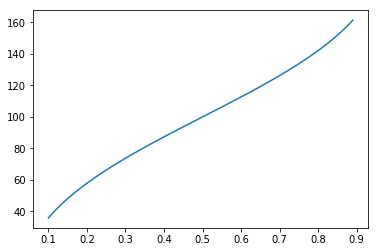

In [4]:
plt.plot(percs, preds)

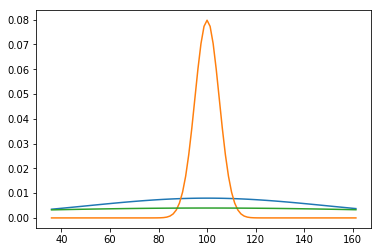

In [5]:
std1 = 50
std2 = 5
std3 = 100

pdf1 = norm.pdf(preds, loc=100, scale=std1)
pdf2 = norm.pdf(preds, loc=100, scale=std2)
pdf3 = norm.pdf(preds, loc=100, scale=std3)

plt.plot(preds,pdf1)
plt.plot(preds,pdf2)
plt.plot(preds,pdf3)

In [6]:
percentiles = np.array([0.1,0.25,0.5,0.75,0.9])
norm.ppf(percentiles, loc=100, scale=std2)

array([  93.59224217,   96.62755125,  100.        ,  103.37244875,
        106.40775783])

In [7]:
norm.cdf(percs, loc=100, scale=50)

array([ 0.02285833,  0.02286917,  0.02288002,  0.02289087,  0.02290173,
        0.02291259,  0.02292346,  0.02293433,  0.0229452 ,  0.02295608,
        0.02296696,  0.02297785,  0.02298874,  0.02299964,  0.02301054,
        0.02302144,  0.02303235,  0.02304326,  0.02305418,  0.0230651 ,
        0.02307603,  0.02308696,  0.02309789,  0.02310883,  0.02311978,
        0.02313072,  0.02314168,  0.02315263,  0.02316359,  0.02317456,
        0.02318553,  0.0231965 ,  0.02320748,  0.02321846,  0.02322945,
        0.02324044,  0.02325144,  0.02326244,  0.02327344,  0.02328445,
        0.02329547,  0.02330649,  0.02331751,  0.02332853,  0.02333957,
        0.0233506 ,  0.02336164,  0.02337269,  0.02338373,  0.02339479,
        0.02340584,  0.02341691,  0.02342797,  0.02343904,  0.02345012,
        0.0234612 ,  0.02347228,  0.02348337,  0.02349446,  0.02350556,
        0.02351666,  0.02352777,  0.02353888,  0.02354999,  0.02356111,
        0.02357224,  0.02358336,  0.0235945 ,  0.02360563,  0.02

In [8]:
vals = np.array([1,2,3,4,5,6,7,8,9])
means = np.array([5]*9)
stds = np.array([2.5]*9)
norm.cdf(vals, loc=means,scale=stds)

array([ 0.05479929,  0.11506967,  0.2118554 ,  0.34457826,  0.5       ,
        0.65542174,  0.7881446 ,  0.88493033,  0.94520071])

In [9]:
mat = np.array ([[1,1,1,1,1],
                 [2,2,2,2,2],
                 [3,3,3,3,3]])
a = np.array([1,2,3,4,5])
mat[0,:] = a

In [10]:
mat

array([[1, 2, 3, 4, 5],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3]])

### Test histograms of LogNormals vs Normals

In [179]:
# parameters
mu = 0.
sigma = 1

In [180]:
# we first take a bunch of percentiles
percs = np.arange(0.1,0.9,0.01)
# get their values
preds = lognorm.ppf(percs,sigma, scale=np.exp(mu))
# and then plot the probability density function using them
logpdf = lognorm.pdf(preds,sigma, scale=np.exp(mu))

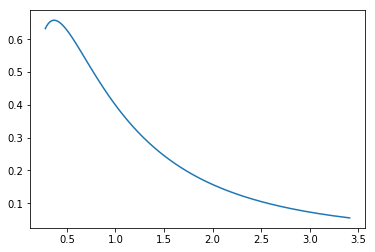

In [181]:
plt.plot(preds,logpdf)

In [187]:
# using the same data we 

# estimate the average (mean for a normal dist)
avg = preds.mean()

# and standard deviation for a normal dist
std = preds.std()

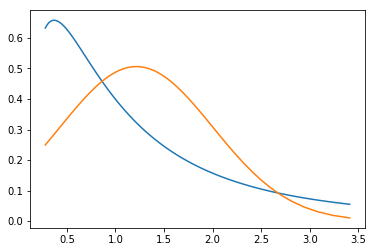

In [188]:
# we now compare both pdfss
pdf = norm.pdf(preds,loc=avg, scale=std)
plt.plot(preds,logpdf)
plt.plot(preds,pdf)

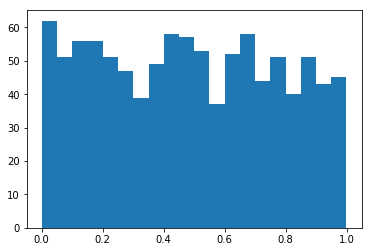

In [191]:
# now we

# sample 1000 random numbers from the lognormal
samples = lognorm.rvs(sigma, scale=np.exp(mu), size = 1000)

# and get the cdfs values from the trained lognormal dist
logcdfs = lognorm.cdf(samples, sigma, scale=np.exp(mu))
# and plot (not how it is mostly uniformly distributed)
plt.hist(logcdfs, bins = 20);

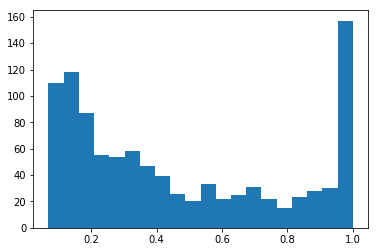

In [192]:
# we repeat the same here

# but instead we compute the 
cdfs = norm.cdf(samples, avg, scale=std)
plt.hist(cdfs, bins = 20);